<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 3 Assignment 2*
# Convolutional Neural Networks (CNNs)

# Assignment

Load a pretrained network from Keras, [ResNet50](https://tfhub.dev/google/imagenet/resnet_v1_50/classification/1) - a 50 layer deep network trained to recognize [1000 objects](https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt). Starting usage:

```python
import numpy as np

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

ResNet50 = ResNet50(weights='imagenet')
features = model.predict(x)

```

Next you will need to remove the last layer from the ResNet model. Here, we loop over the layers to use the sequential API. There are easier ways to add and remove layers using the Keras functional API, but doing so introduces other complexities. 

```python
# Remote the Last Layer of ResNEt
ResNet50._layers.pop(0)

# Out New Model
model = Sequential()

# Add Pre-trained layers of Old Model to New Model
for layer in ResNet50.layers:
    model.add(layer)

# Turn off additional training of ResNet Layers for speed of assignment
for layer in model.layers:
    layer.trainable = False

# Add New Output Layer to Model
model.add(Dense(1, activation='sigmoid'))
```

Your assignment is to apply the transfer learning above to classify images of Mountains (`./data/mountain/*`) and images of forests (`./data/forest/*`). Treat mountains as the postive class (1) and the forest images as the negative (zero). 

Steps to complete assignment: 
1. Load in Image Data into numpy arrays (`X`) 
2. Create a `y` for the labels
3. Train your model with pretrained layers from resnet
4. Report your model's accuracy

In [22]:
''' Imports and such '''
import numpy as np
import matplotlib.pyplot as plt
import os 
import glob 
from IPython.display import Image
import random
import matplotlib.pyplot

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical


In [10]:
res = ResNet50(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

# Remote the Last Layer of ResNE

# make all resnet layers untrainable
for layer in res.layers:
    layer.trainable = False
    
# add your head on top
x = res.output
predictions = Dense(1, activation='sigmoid')(x)
model = Model(res.input, predictions)

/Users/Inceptive/anaconda3/lib/python3.7/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [17]:
### YOUR CODE HERE
def process_image_path(img_path):
    return image.load_img(img_path, target_size=(224, 224))


def image_contains_mountain(img):
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    model = ResNet50(weights='imagenet')
    features = model.predict(x)
    results = decode_predictions(features, top=3)[0]
    print(results)
    #for entry in results:
     #   if entry[1] == 'mountain':
      #      return entry[2]
    #return 0.0


def image_contains_forest(img):
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    model = ResNet50(weights='imagenet')
    features = model.predict(x)
    results = decode_predictions(features, top=3)[0]
    print(results)
    for entry in results:
        if entry[1] == 'forest':
            return entry[2]
    return 0.0

[('n09193705', 'alp', 0.9746936), ('n09468604', 'valley', 0.005970508), ('n04228054', 'ski', 0.0027997089)]
0.0


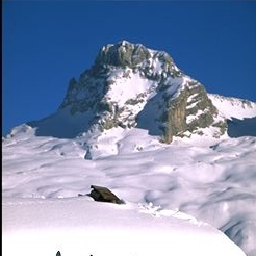

In [12]:
''' Displaying First image to try out predicatability of the model '''


''' Running the model '''
print(image_contains_mountain(process_image_path('./data/mountain/art1131.jpg')))
Image(filename='./data/mountain/art1131.jpg', width=600)



[('n02843684', 'birdhouse', 0.20658205), ('n03388043', 'fountain', 0.1777161), ('n02999410', 'chain', 0.07041908)]
0.0


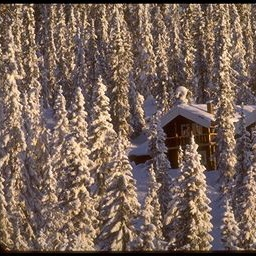

In [13]:
''' now to run a quick forest Example  '''
''' Displaying First image to try out predicatability of the model '''
print(image_contains_forest(process_image_path('./data/forest/art114.jpg')))
Image(filename='./data/forest/art114.jpg', width=600)

In [14]:
''' Making the paths to directories  '''
mountain_directory = glob.glob('./data/mountain/*.jpg')
forest_directory = glob.glob('./data/forest/*.jpg')

In [7]:
''' Mountain classifications with ResNet50 for the first 20 images  '''
for i in mountain_directory[:20]:
    image_contains_mountain(process_image_path(i))

[('n09193705', 'alp', 0.96273905), ('n09468604', 'valley', 0.027240312), ('n03792972', 'mountain_tent', 0.005451165)]
[('n09193705', 'alp', 0.93274266), ('n09468604', 'valley', 0.038279664), ('n09246464', 'cliff', 0.016493216)]
[('n09193705', 'alp', 0.97000253), ('n09468604', 'valley', 0.016329462), ('n03792972', 'mountain_tent', 0.0050653317)]
[('n09193705', 'alp', 0.7304777), ('n09472597', 'volcano', 0.031290017), ('n04228054', 'ski', 0.027916359)]
[('n09193705', 'alp', 0.53297937), ('n09468604', 'valley', 0.33670574), ('n09246464', 'cliff', 0.060724333)]
[('n09193705', 'alp', 0.64208674), ('n09468604', 'valley', 0.21190499), ('n09246464', 'cliff', 0.09531116)]
[('n09193705', 'alp', 0.83715), ('n09472597', 'volcano', 0.0742687), ('n03792972', 'mountain_tent', 0.026682246)]
[('n09193705', 'alp', 0.82809144), ('n03792972', 'mountain_tent', 0.03959822), ('n04228054', 'ski', 0.028065152)]
[('n09468604', 'valley', 0.7245087), ('n09193705', 'alp', 0.12542377), ('n09246464', 'cliff', 0.0589

In [8]:
''' Forest Classifications with Resnet50 for the first 20 images  '''
for i in forest_directory[:20]:
    image_contains_mountain(process_image_path(i))
    
'''    
print(image_contains_forest(process_image_path('./data/forest/art114.jpg')))
Image(filename='./data/forest/art114.jpg', width=600)
'''

[('n03991062', 'pot', 0.29657617), ('n03457902', 'greenhouse', 0.1777665), ('n07714990', 'broccoli', 0.08351413)]
[('n09332890', 'lakeside', 0.08683838), ('n02009912', 'American_egret', 0.052518737), ('n09468604', 'valley', 0.046925515)]
[('n09332890', 'lakeside', 0.47919285), ('n09468604', 'valley', 0.1094563), ('n04326547', 'stone_wall', 0.08283742)]
[('n03733281', 'maze', 0.13293698), ('n03891251', 'park_bench', 0.07600125), ('n03792782', 'mountain_bike', 0.034927566)]
[('n03891251', 'park_bench', 0.23465617), ('n04371774', 'swing', 0.14565603), ('n04604644', 'worm_fence', 0.07608594)]
[('n04326547', 'stone_wall', 0.2870253), ('n03891251', 'park_bench', 0.18372141), ('n09332890', 'lakeside', 0.072882846)]
[('n09332890', 'lakeside', 0.2763429), ('n02859443', 'boathouse', 0.11477598), ('n02410509', 'bison', 0.09517668)]
[('n03976657', 'pole', 0.33698457), ('n09468604', 'valley', 0.06759191), ('n04604644', 'worm_fence', 0.05800344)]
[('n09332890', 'lakeside', 0.10113274), ('n04604644',

"    \nprint(image_contains_forest(process_image_path('./data/forest/art114.jpg')))\nImage(filename='./data/forest/art114.jpg', width=600)\n"

In [18]:
''' Creating the path in order to loop through both classification and image  '''
paths = []
for i in ['forest', 'mountain']:
    for file in os.listdir('./data/'+i):
        if file[-3:] == 'jpg':
            path = os.path.join(f'./data/{i}/' + file)
            paths.append(path)

[('n09468604', 'valley', 0.78015697), ('n04366367', 'suspension_bridge', 0.083413385), ('n09332890', 'lakeside', 0.033962335)]


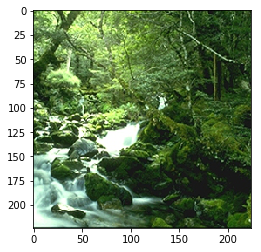

[('n13052670', 'hen-of-the-woods', 0.2961568), ('n04326547', 'stone_wall', 0.23276713), ('n03792972', 'mountain_tent', 0.072211534)]


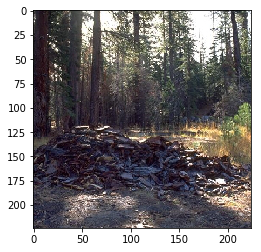

[('n09246464', 'cliff', 0.65088654), ('n09468604', 'valley', 0.127671), ('n09399592', 'promontory', 0.09132567)]


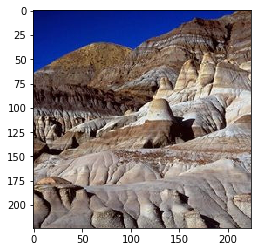

[('n09193705', 'alp', 0.4869988), ('n09468604', 'valley', 0.30692053), ('n09332890', 'lakeside', 0.076708406)]


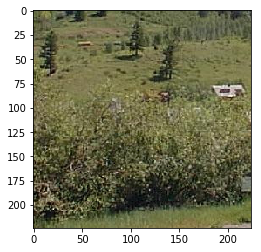

[('n09193705', 'alp', 0.9028969), ('n09468604', 'valley', 0.05644225), ('n03792972', 'mountain_tent', 0.017110914)]


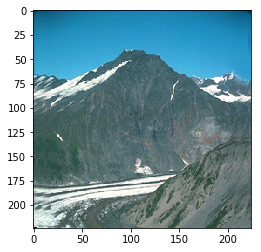

[('n03781244', 'monastery', 0.1812807), ('n09332890', 'lakeside', 0.0752568), ('n03733281', 'maze', 0.069951914)]


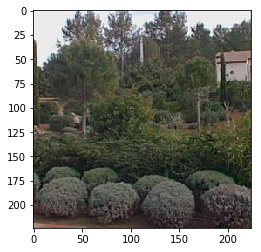

[('n09193705', 'alp', 0.83423954), ('n09246464', 'cliff', 0.066705845), ('n04228054', 'ski', 0.0143105965)]


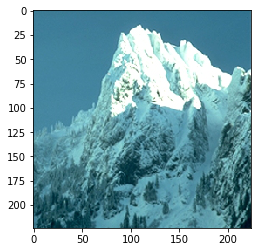

[('n09193705', 'alp', 0.9745984), ('n04228054', 'ski', 0.011727547), ('n09468604', 'valley', 0.008554435)]


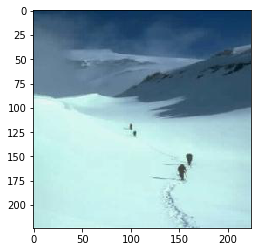

[('n02009912', 'American_egret', 0.06416333), ('n02009229', 'little_blue_heron', 0.036284536), ('n02133161', 'American_black_bear', 0.03262288)]


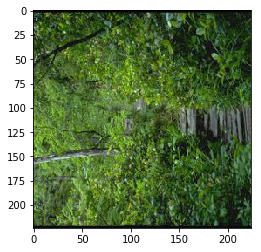

[('n09468604', 'valley', 0.49398342), ('n09246464', 'cliff', 0.33830914), ('n09193705', 'alp', 0.108125545)]


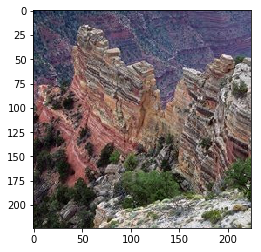

[('n03930313', 'picket_fence', 0.18589637), ('n03891251', 'park_bench', 0.14590435), ('n03837869', 'obelisk', 0.08270176)]


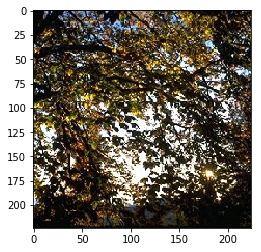

[('n09468604', 'valley', 0.29117167), ('n09332890', 'lakeside', 0.23307043), ('n09246464', 'cliff', 0.15326586)]


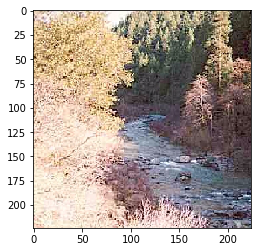

[('n09193705', 'alp', 0.6845638), ('n09468604', 'valley', 0.23269953), ('n09332890', 'lakeside', 0.045818236)]


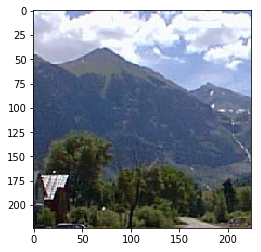

[('n09193705', 'alp', 0.696468), ('n09468604', 'valley', 0.12576857), ('n03792972', 'mountain_tent', 0.03138576)]


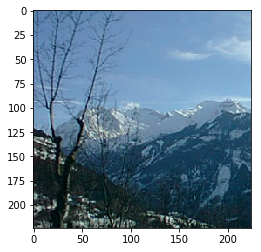

[('n09193705', 'alp', 0.7440522), ('n09468604', 'valley', 0.08351123), ('n03042490', 'cliff_dwelling', 0.08011048)]


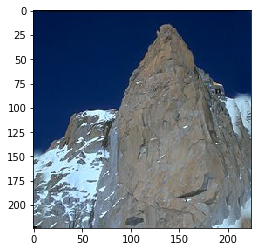

[('n09193705', 'alp', 0.91903746), ('n04228054', 'ski', 0.020700835), ('n04252077', 'snowmobile', 0.012083019)]


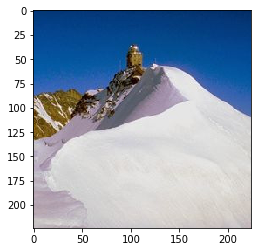

[('n09468604', 'valley', 0.34653085), ('n09246464', 'cliff', 0.24631609), ('n09399592', 'promontory', 0.13193393)]


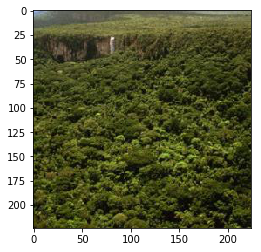

[('n03697007', 'lumbermill', 0.6059084), ('n04326547', 'stone_wall', 0.03992774), ('n03792782', 'mountain_bike', 0.03072148)]


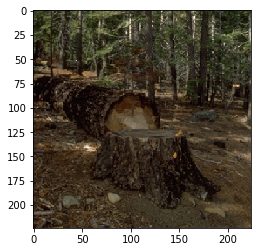

[('n09468604', 'valley', 0.7060954), ('n03792782', 'mountain_bike', 0.07900721), ('n09246464', 'cliff', 0.015845211)]


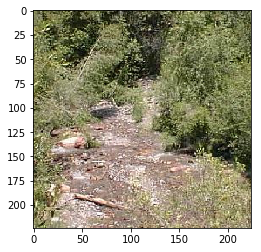

[('n09193705', 'alp', 0.9313393), ('n09468604', 'valley', 0.053832714), ('n09246464', 'cliff', 0.008232808)]


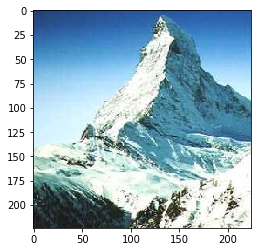

In [23]:
''' Image classification for random sample of 20 images from the data  '''
for path in random.sample(paths,20):
    img =  process_image_path(path)
    image_contains_mountain(img)
    plt.imshow(img)
    plt.show();

# Resources and Stretch Goals

Stretch goals
- Enhance your code to use classes/functions and accept terms to search and classes to look for in recognizing the downloaded images (e.g. download images of parties, recognize all that contain balloons)
- Check out [other available pretrained networks](https://tfhub.dev), try some and compare
- Image recognition/classification is somewhat solved, but *relationships* between entities and describing an image is not - check out some of the extended resources (e.g. [Visual Genome](https://visualgenome.org/)) on the topic
- Transfer learning - using images you source yourself, [retrain a classifier](https://www.tensorflow.org/hub/tutorials/image_retraining) with a new category
- (Not CNN related) Use [piexif](https://pypi.org/project/piexif/) to check out the metadata of images passed in to your system - see if they're from a national park! (Note - many images lack GPS metadata, so this won't work in most cases, but still cool)

Resources
- [Deep Residual Learning for Image Recognition](https://arxiv.org/abs/1512.03385) - influential paper (introduced ResNet)
- [YOLO: Real-Time Object Detection](https://pjreddie.com/darknet/yolo/) - an influential convolution based object detection system, focused on inference speed (for applications to e.g. self driving vehicles)
- [R-CNN, Fast R-CNN, Faster R-CNN, YOLO](https://towardsdatascience.com/r-cnn-fast-r-cnn-faster-r-cnn-yolo-object-detection-algorithms-36d53571365e) - comparison of object detection systems
- [Common Objects in Context](http://cocodataset.org/) - a large-scale object detection, segmentation, and captioning dataset
- [Visual Genome](https://visualgenome.org/) - a dataset, a knowledge base, an ongoing effort to connect structured image concepts to language